In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usegaarea/categor.jpg
/kaggle/input/svmachines/Supportvectormachines.jpg
/kaggle/input/breast-cancer/cell_samples.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Support Vector Machines:

<font color="blue">
*They are supervised machine learning models with associated algorithms that analyze data and recognize patterns used for classification and regression analysis

*This notebook will focus for classification

*SVM training algorithm builds a model that assigns new examples or at least test data points into one category or the other making it a non-probabilistic binary linear classifier

*The separate categories are divided by a clear gap as wide as possible and new examples are predicted to belong to a category based on which side of the gap they fall on

*The algorith draw a separating hyperplane between the two classes. But this separating line should be the best option. The algorithm chooses a hyperplane that maximizes the margin between the classes which touch the end points of the both classes, which are also known as the support vectors.

*This separation can also be extended to nonlinear data

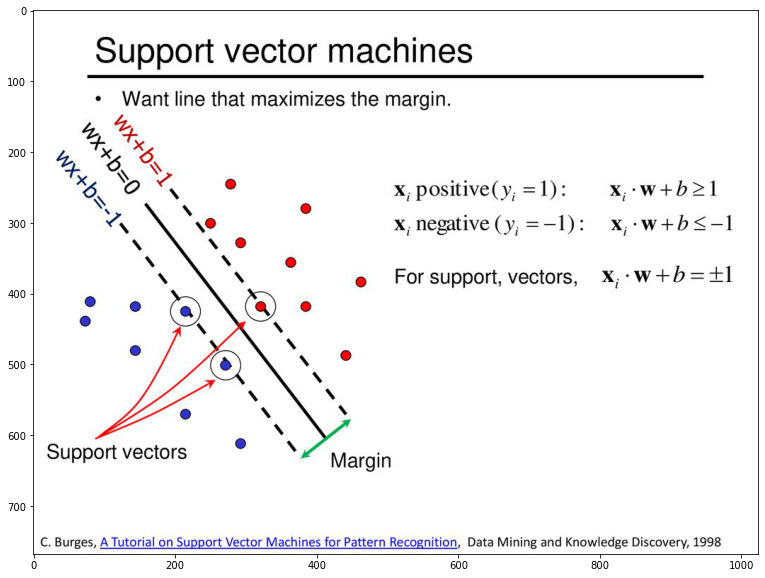

In [3]:
plt.figure(figsize=(20,10))
image = plt.imread('../input/svmachines/Supportvectormachines.jpg')
plt.imshow(image)

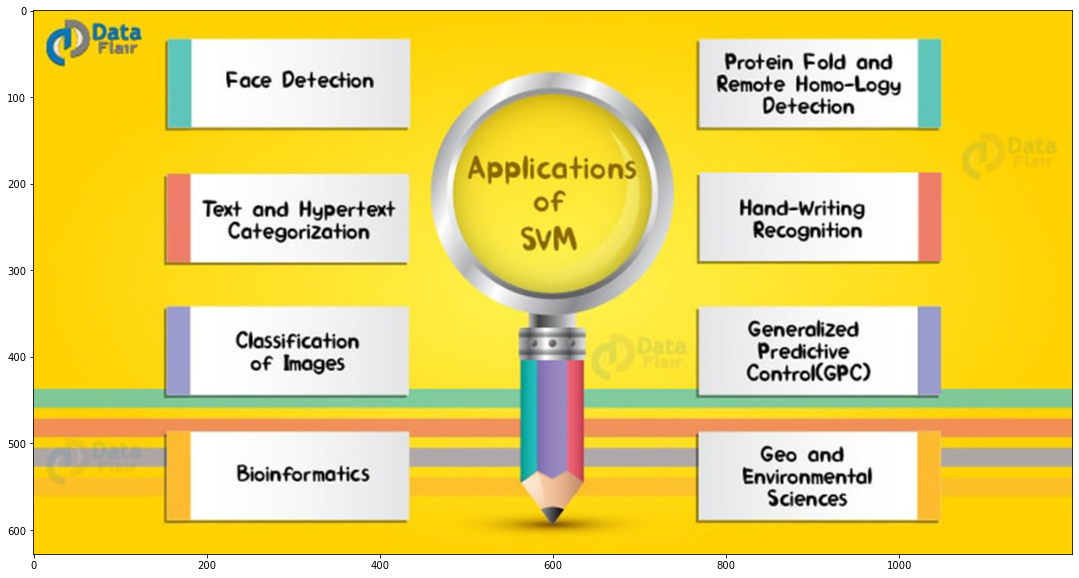

In [4]:
plt.figure(figsize=(20,10))
image = plt.imread('../input/usegaarea/categor.jpg')
plt.imshow(image)

In [5]:
df=pd.read_csv("../input/breast-cancer/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


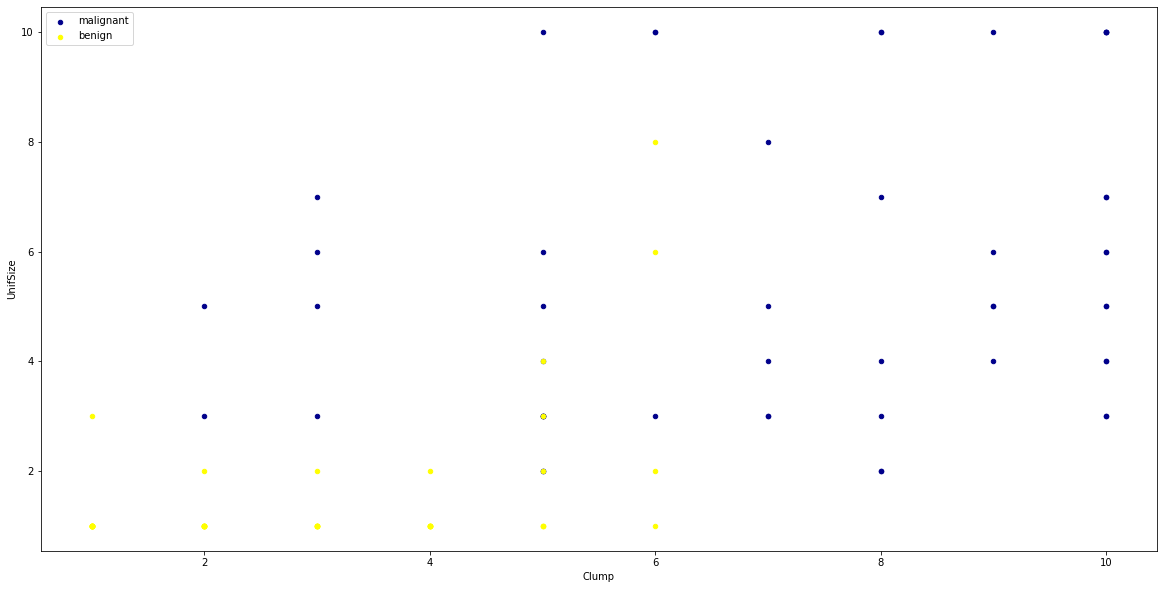

In [6]:

ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax,figsize=(20,10));
plt.show() #Here is the visualization of our target column

In [7]:
df.isnull().sum()
#There is no any missing data in our data set

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [8]:
df.drop(["ID","BareNuc"],axis=1,inplace=True)
#We get rid of the columns that are not useful

In [9]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [10]:
df.corr()["Class"].sort_values()
#Here we can see the correlation between the target and the othewr columns

Mit            0.423170
SingEpiSize    0.682785
MargAdh        0.696800
NormNucl       0.712244
Clump          0.716001
BlandChrom     0.756616
UnifSize       0.817904
UnifShape      0.818934
Class          1.000000
Name: Class, dtype: float64

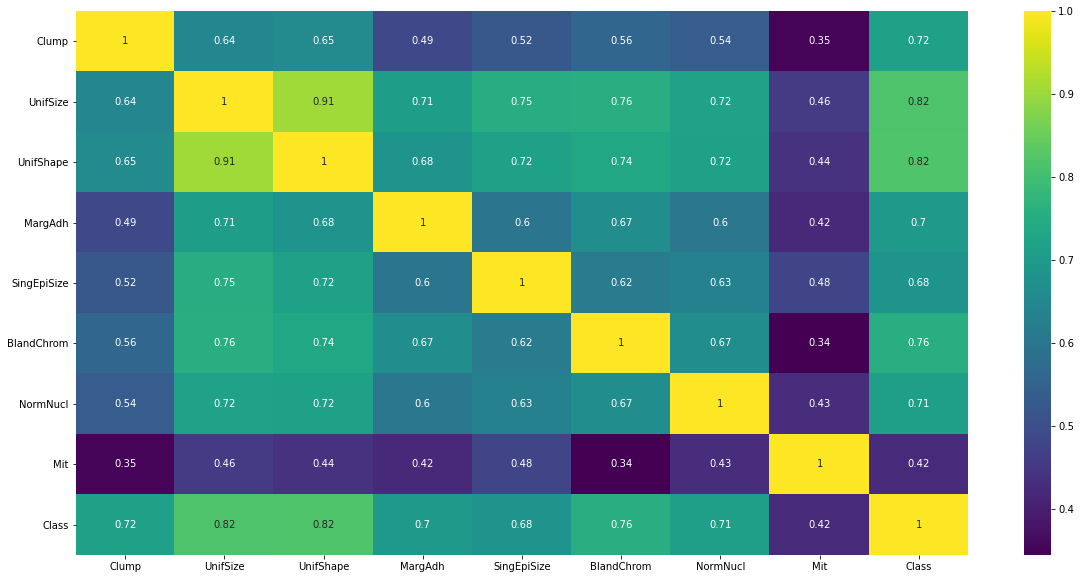

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="viridis",annot=True)
#here is a heatmap of correlations, we see that UnifSize and UnifShape has a the highest postive correlation with the target column

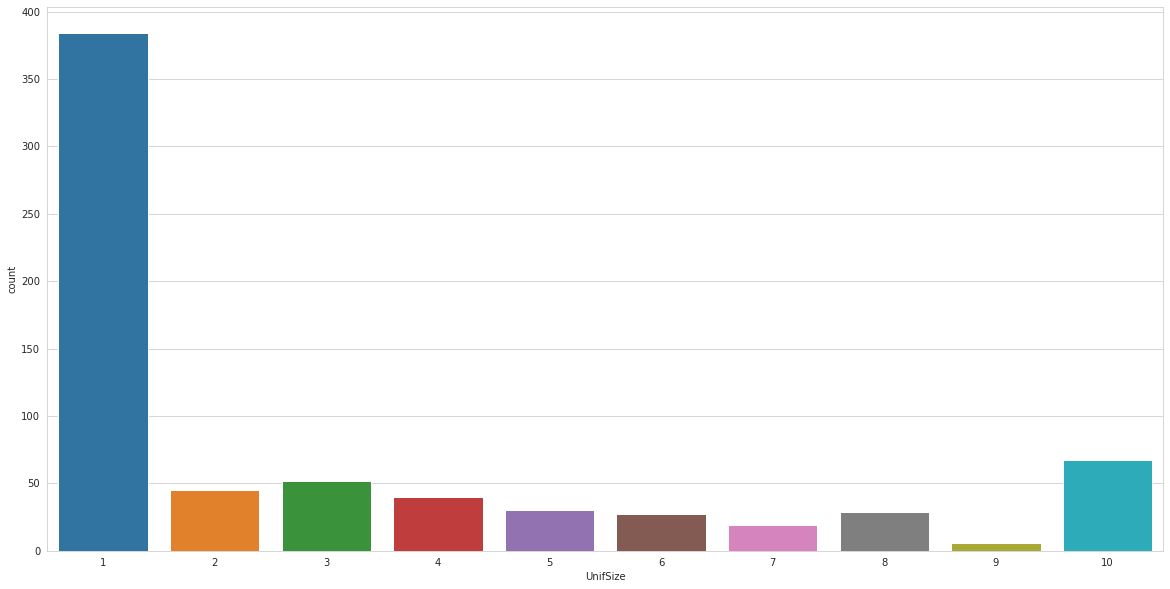

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x="UnifSize",data=df)

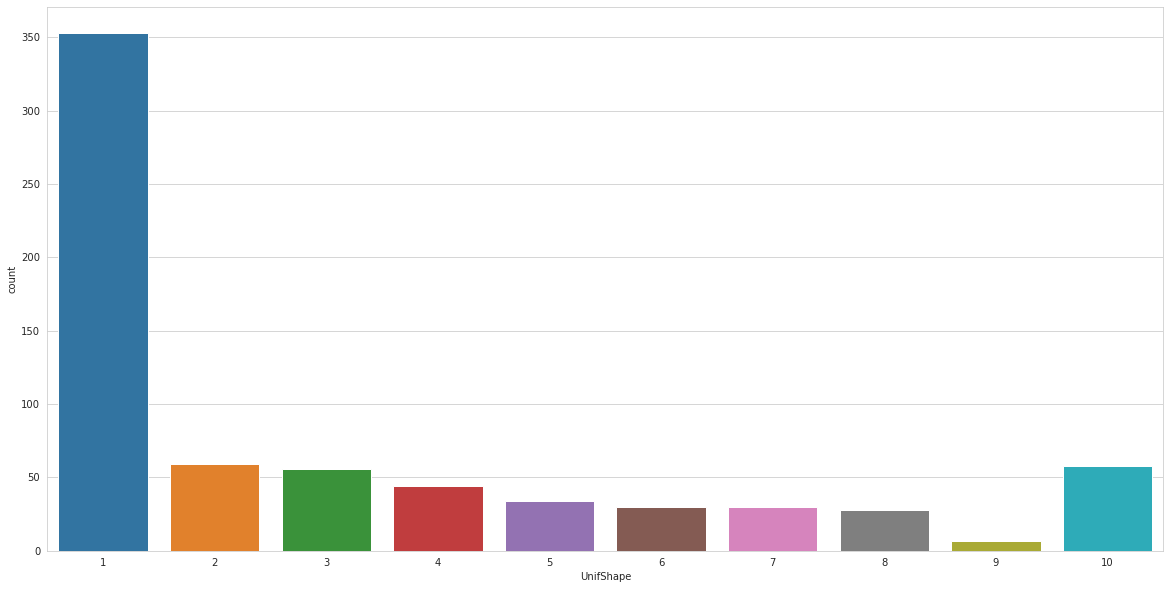

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x="UnifShape",data=df)

<font color="blue">
    Now our data is ready for the algorithm.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop("Class",axis=1)#We assign all coluns as features except from the target columns
y=df["Class"]

In [16]:
X.shape

(699, 8)

In [17]:
y.shape

(699,)

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3) 
#Here we split %30 of our data as test set and %70 as train set

In [19]:
print(X_train.shape)
print("***********")
print(X_test.shape)
print("***********")
print(y_train.shape)
print("***********")
print(y_test.shape)

(489, 8)
***********
(210, 8)
***********
(489,)
***********
(210,)


In [20]:
from sklearn.svm import SVC

In [21]:
model=SVC()

In [22]:
model.fit(X_train, y_train)

SVC()

In [23]:
predictions=model.predict(X_test)

<font color="blue">
    Here we evaluate the performance of our model

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test,predictions))
print("*****************************************")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       141
           4       0.91      0.93      0.92        69

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

*****************************************
[[135   6]
 [  5  64]]


<font color="blue">
    Here we can compare these results with other classification ML models as follows:

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model2=LogisticRegression()

In [28]:
model2.fit(X_train, y_train)

LogisticRegression()

In [29]:
predictions2=model2.predict(X_test)

In [30]:
print(classification_report(y_test,predictions2))
print("*****************************************")
print(confusion_matrix(y_test,predictions2))

              precision    recall  f1-score   support

           2       0.94      0.97      0.96       141
           4       0.94      0.88      0.91        69

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210

*****************************************
[[137   4]
 [  8  61]]


<font color="blue">
    We have almost the same results with Logistic regression in this dataset.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model3= DecisionTreeClassifier()

In [33]:
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
predictions3=model3.predict(X_test)

In [35]:
print(classification_report(y_test,predictions3))
print("*****************************************")
print(confusion_matrix(y_test,predictions3))

              precision    recall  f1-score   support

           2       0.92      0.95      0.94       141
           4       0.89      0.84      0.87        69

    accuracy                           0.91       210
   macro avg       0.91      0.90      0.90       210
weighted avg       0.91      0.91      0.91       210

*****************************************
[[134   7]
 [ 11  58]]


<font color="blue">
    We have almost the same results with Decision trees in this dataset.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
error_rate=list()
#here we iterate meny different k values and plot their error rates 
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

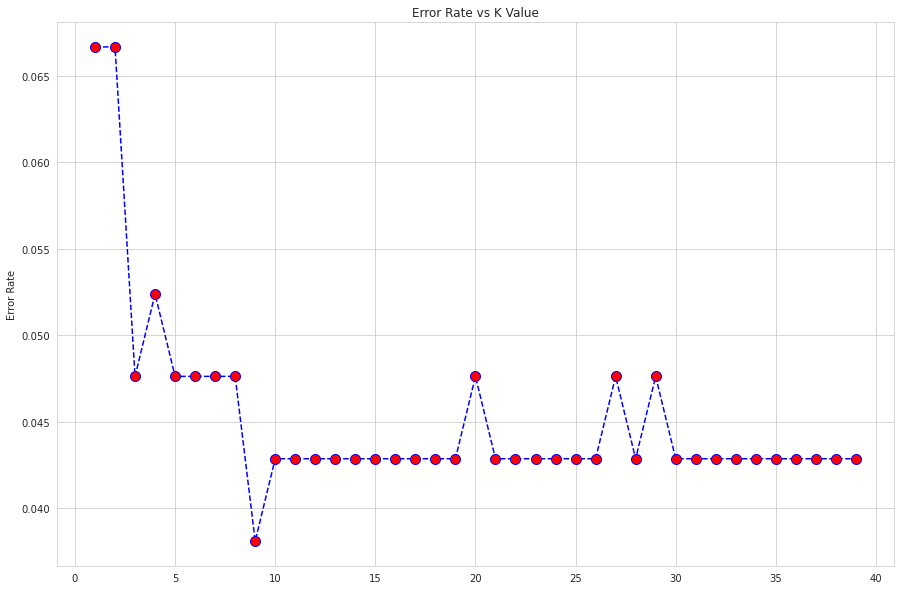

In [38]:
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

From the figure above , we see that k=3,5,9,11,13,15-15 gives the least error. We can choose any of them.

In [39]:
knn=KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
predictions4=knn.predict(X_test)

In [42]:
print(classification_report(y_test,predictions4))
print("*****************************************")
print(confusion_matrix(y_test,predictions4))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       141
           4       0.93      0.93      0.93        69

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

*****************************************
[[136   5]
 [  5  64]]


<font color="blue">
    We have almost the same results with K Nearest Neigbors in this dataset.

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [44]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
predictions5=rfc.predict(X_test)

In [46]:
print(classification_report(y_test,predictions5))
print("*****************************************")
print(confusion_matrix(y_test,predictions5))

              precision    recall  f1-score   support

           2       0.94      0.96      0.95       141
           4       0.92      0.88      0.90        69

    accuracy                           0.94       210
   macro avg       0.93      0.92      0.93       210
weighted avg       0.94      0.94      0.94       210

*****************************************
[[136   5]
 [  8  61]]


<font color="blue">
    We have almost the same results with Random Forest Classifier in this dataset.